In [2]:
import cv2
import sys 
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os.path

from skimage.transform import radon, iradon
from scipy.io import loadmat
from scipy.stats import poisson
import skimage.measure as measure
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

numero de iteraciones: 1


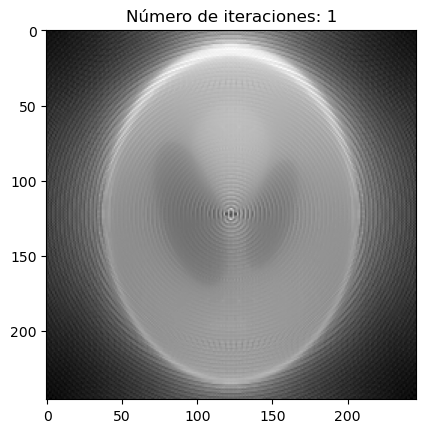

numero de iteraciones: 2


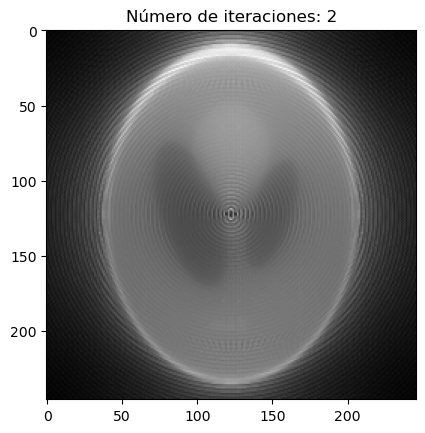

numero de iteraciones: 3


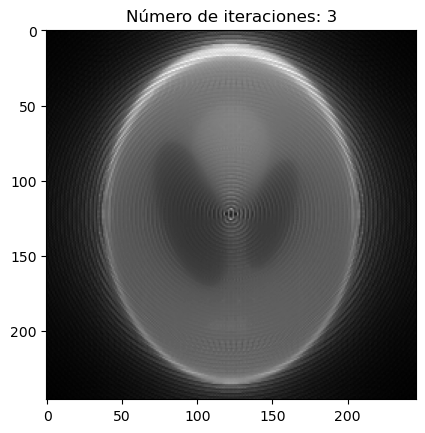

numero de iteraciones: 4


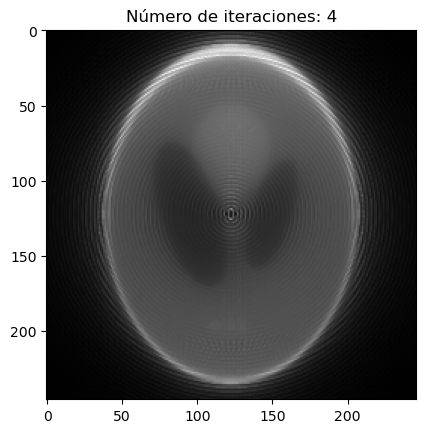

numero de iteraciones: 5


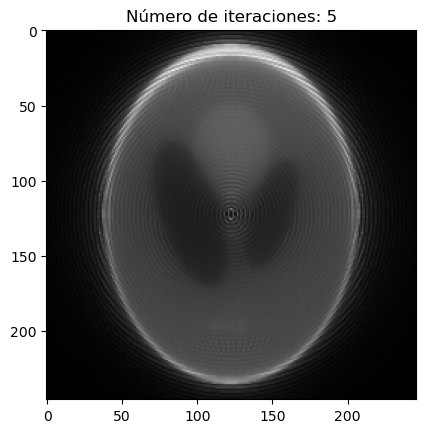

numero de iteraciones: 6


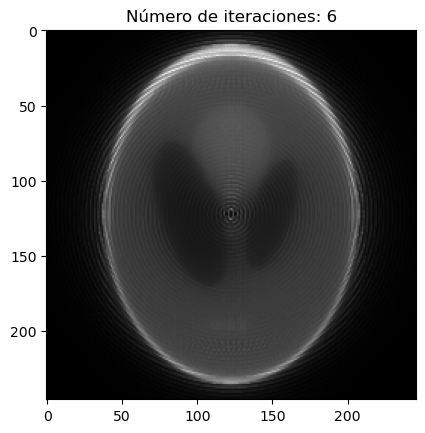

numero de iteraciones: 7


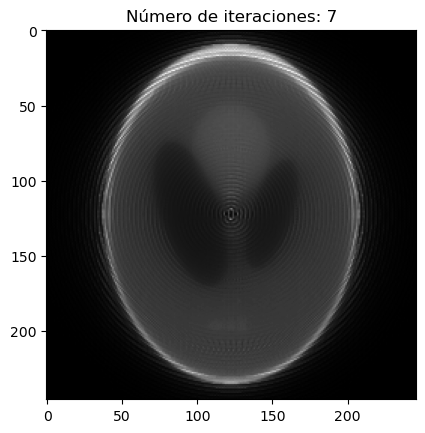

numero de iteraciones: 8


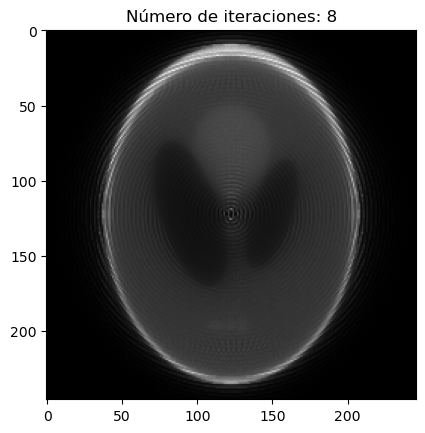

numero de iteraciones: 9


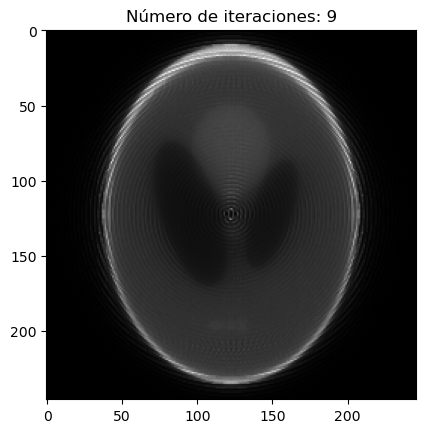

numero de iteraciones: 10


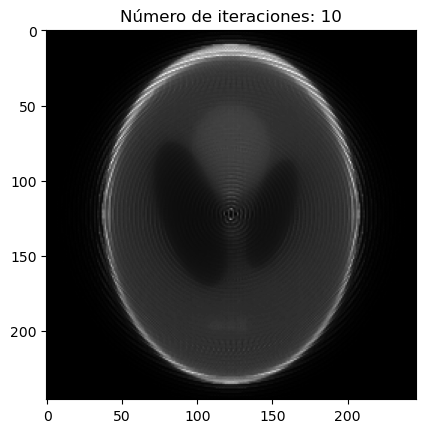

In [5]:
# de 60 a 300 con 10 pasos redondeando hacia arriba
detect =np.array([1,2,3,4,5,6,7,8,9,10])
detect = np.array([1,10])

art_mse = []
art_psnr = []
art_ssim = []

for i in detect:
    x_0_str = 'original.mat'
    x_art_str = 'EM_{}.mat'.format(i)

    x_0 = loadmat(x_0_str)['x_ex']
    x_art = loadmat(x_art_str)['x_0']

    print('numero de iteraciones: {}'.format(i))

    plt.figure()
    plt.title('Número de iteraciones: {}'.format(i))
    plt.imshow(x_art, cmap='gray')
    if i == 1 or i == 10 : plt.savefig('EM_{}.png'.format(i), dpi=300, bbox_inches='tight')
    plt.show()

    nor = np.amax(x_0)
    art_mse.append(mse(x_0, x_art))
    art_psnr.append(psnr(x_0/nor, x_art/nor))
    art_ssim.append(ssim(x_0/nor, x_art/nor, data_range=256))




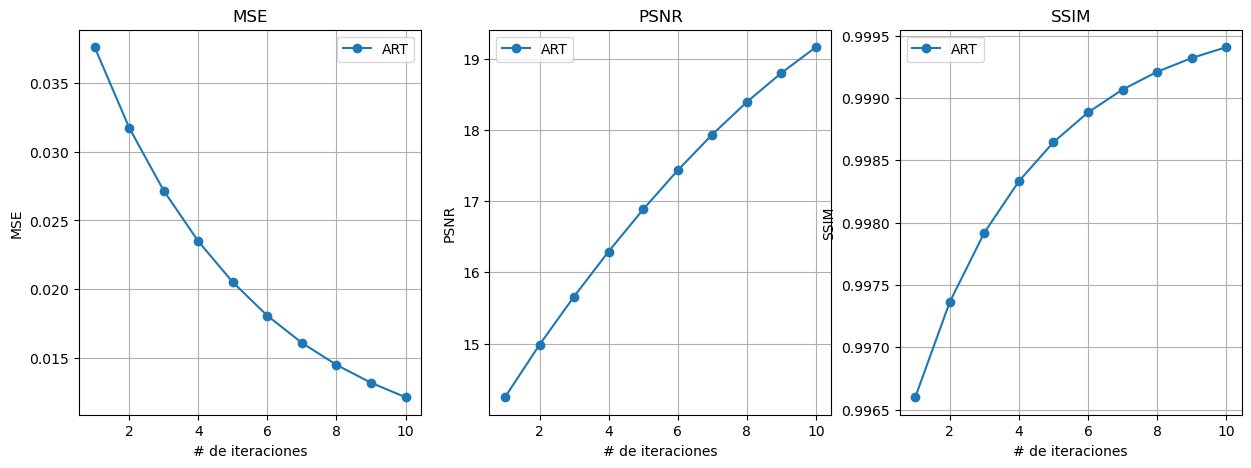

In [4]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.grid()
plt.plot(detect, art_mse,'-o', label='ART')
plt.xlabel('# de iteraciones')
plt.ylabel('MSE')
plt.title('MSE')
plt.legend()

plt.subplot(1,3,2)
plt.grid()
plt.plot(detect, art_psnr,'-o', label='ART')
plt.xlabel('# de iteraciones')
plt.ylabel('PSNR')
plt.title('PSNR')
plt.legend()

plt.subplot(1,3,3)
plt.grid()
plt.plot(detect, art_ssim,'-o', label='ART')
plt.xlabel('# de iteraciones')
plt.ylabel('SSIM')
plt.title('SSIM')
plt.legend()

plt.savefig('resultados_ex_max.png', dpi=300, bbox_inches='tight')
